In [173]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv('/content/diabetes.csv')

# Data Understanding

In [175]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [176]:
df.shape

(768, 9)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [178]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Exploratory Data Analysis

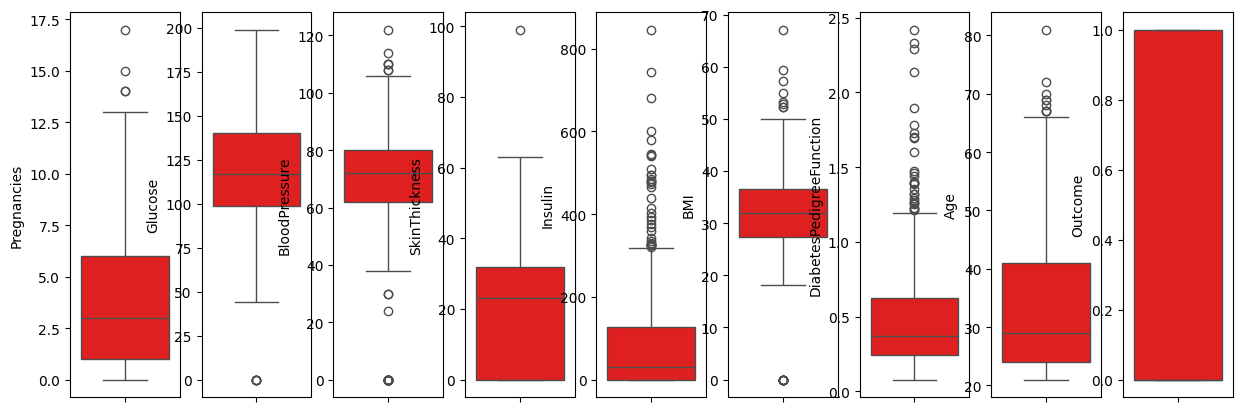

In [179]:
plt.figure(figsize=(15,5))

for i, col in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)
    sns.boxplot(y=df[col], color='red')
    plt.tight_layout

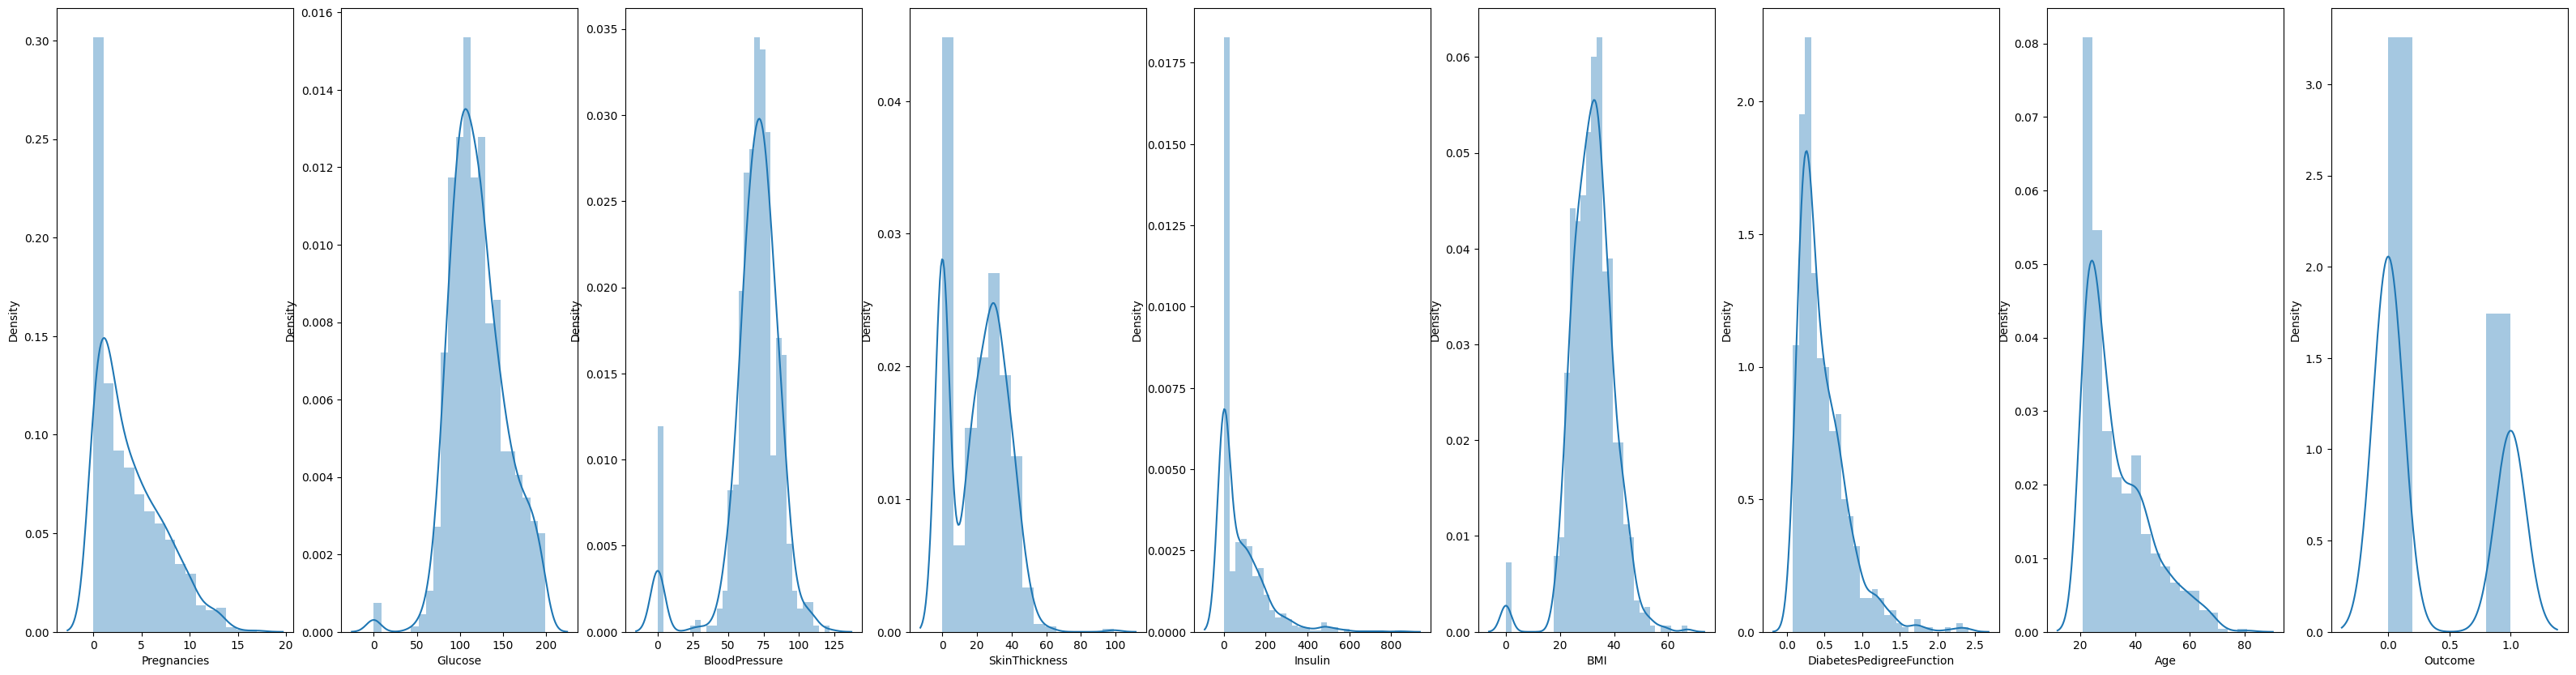

In [180]:
plt.figure(figsize=(40,10))

for i, col in enumerate(df.columns,1):
  plt.subplot(1, len(df.columns), i)
  sns.distplot(df[col],kde=True)
  plt.tight_layout

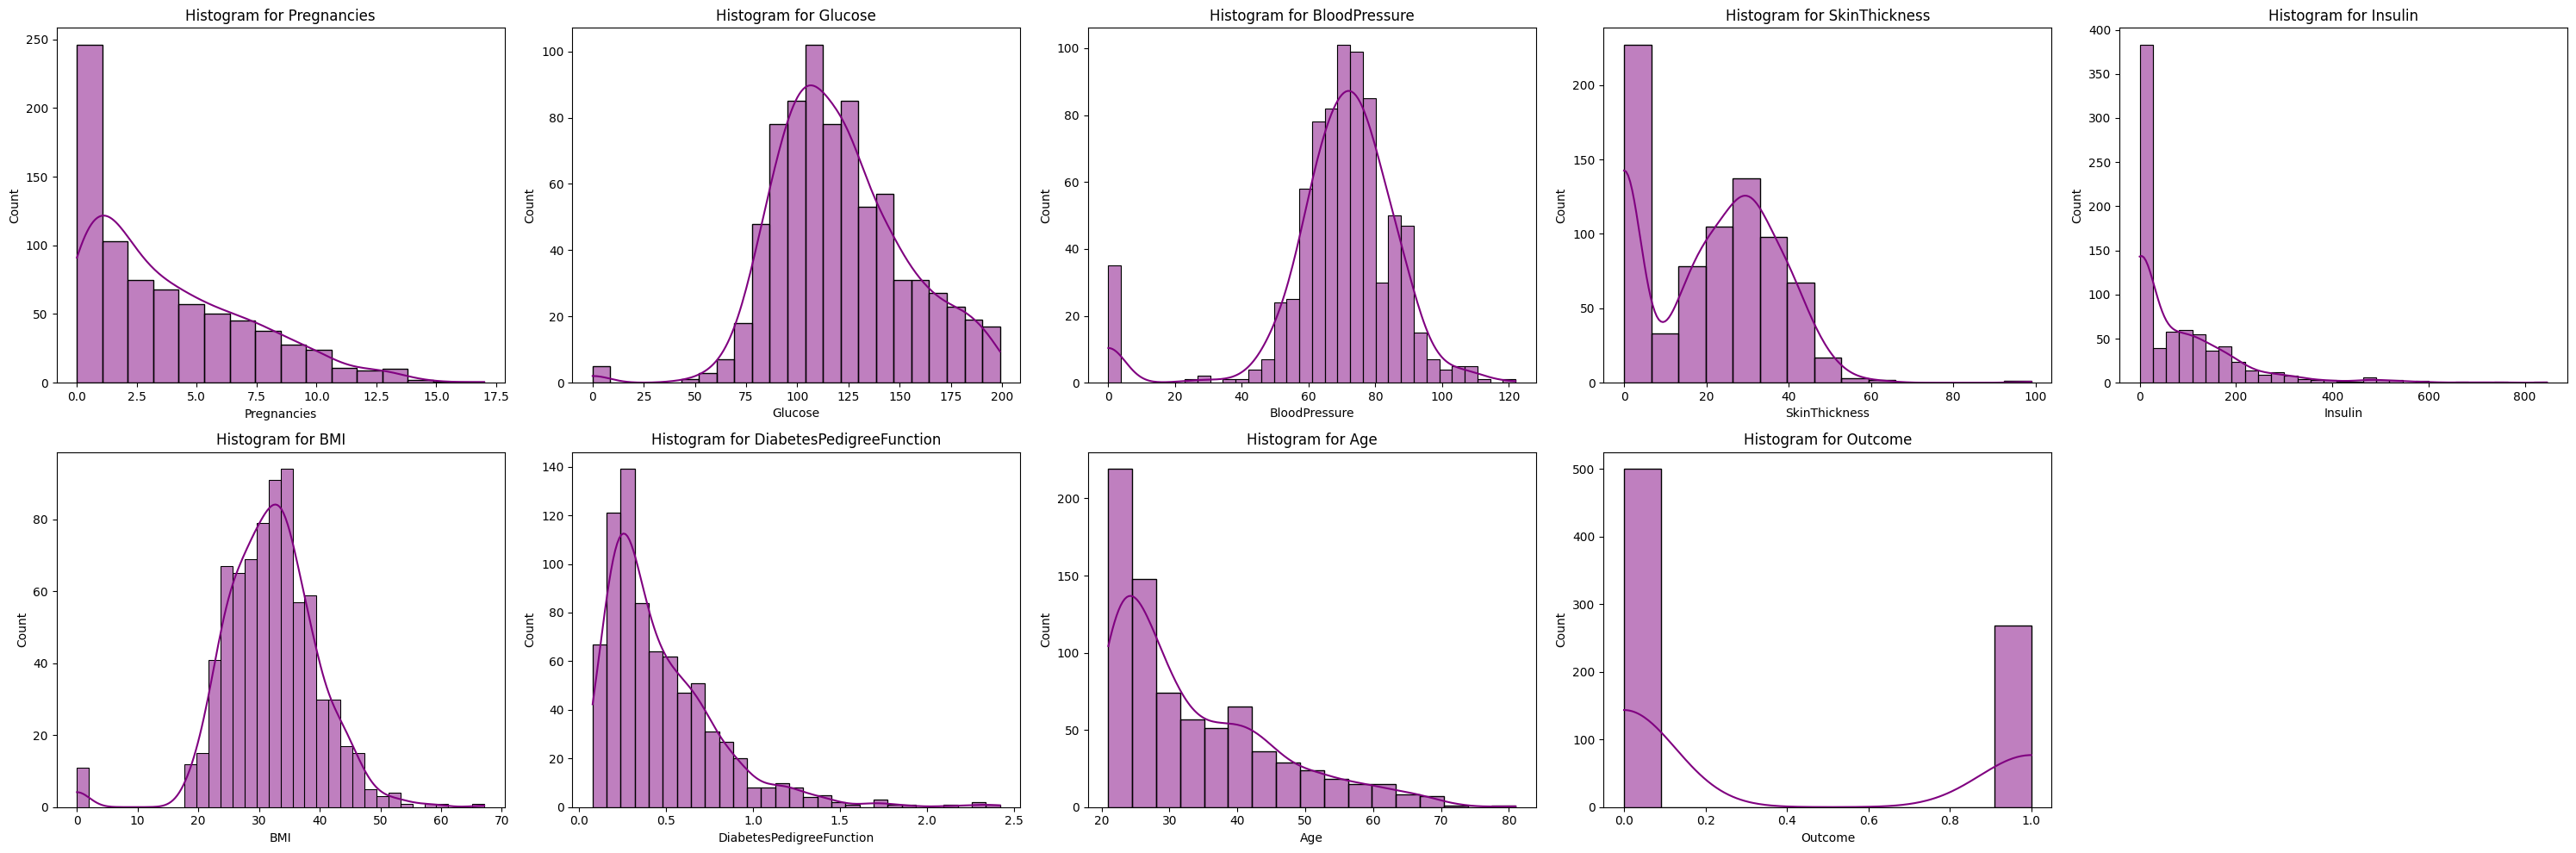

In [181]:
plt.figure(figsize=(30,10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(2, 5, i)
    sns.histplot(x=col, data=df,kde=True, color='purple')
    plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()

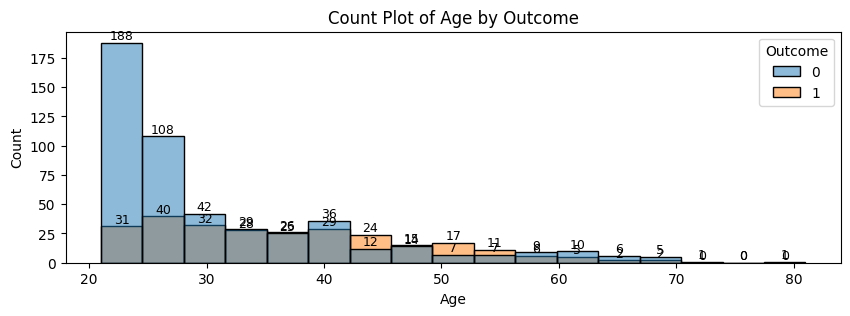

In [182]:
plt.figure(figsize=(10, 3))
ax = sns.histplot(x='Age', hue='Outcome', data=df, common_norm=False)

# Add text annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{round(height, 2)}', ha='center', va='bottom', fontsize=9)

plt.tick_params(axis='x')
plt.title('Count Plot of Age by Outcome')
plt.show()

<Axes: >

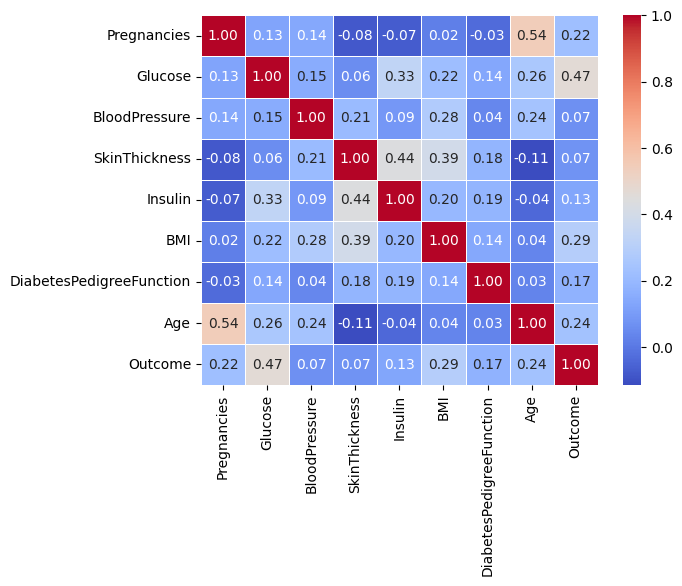

In [183]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

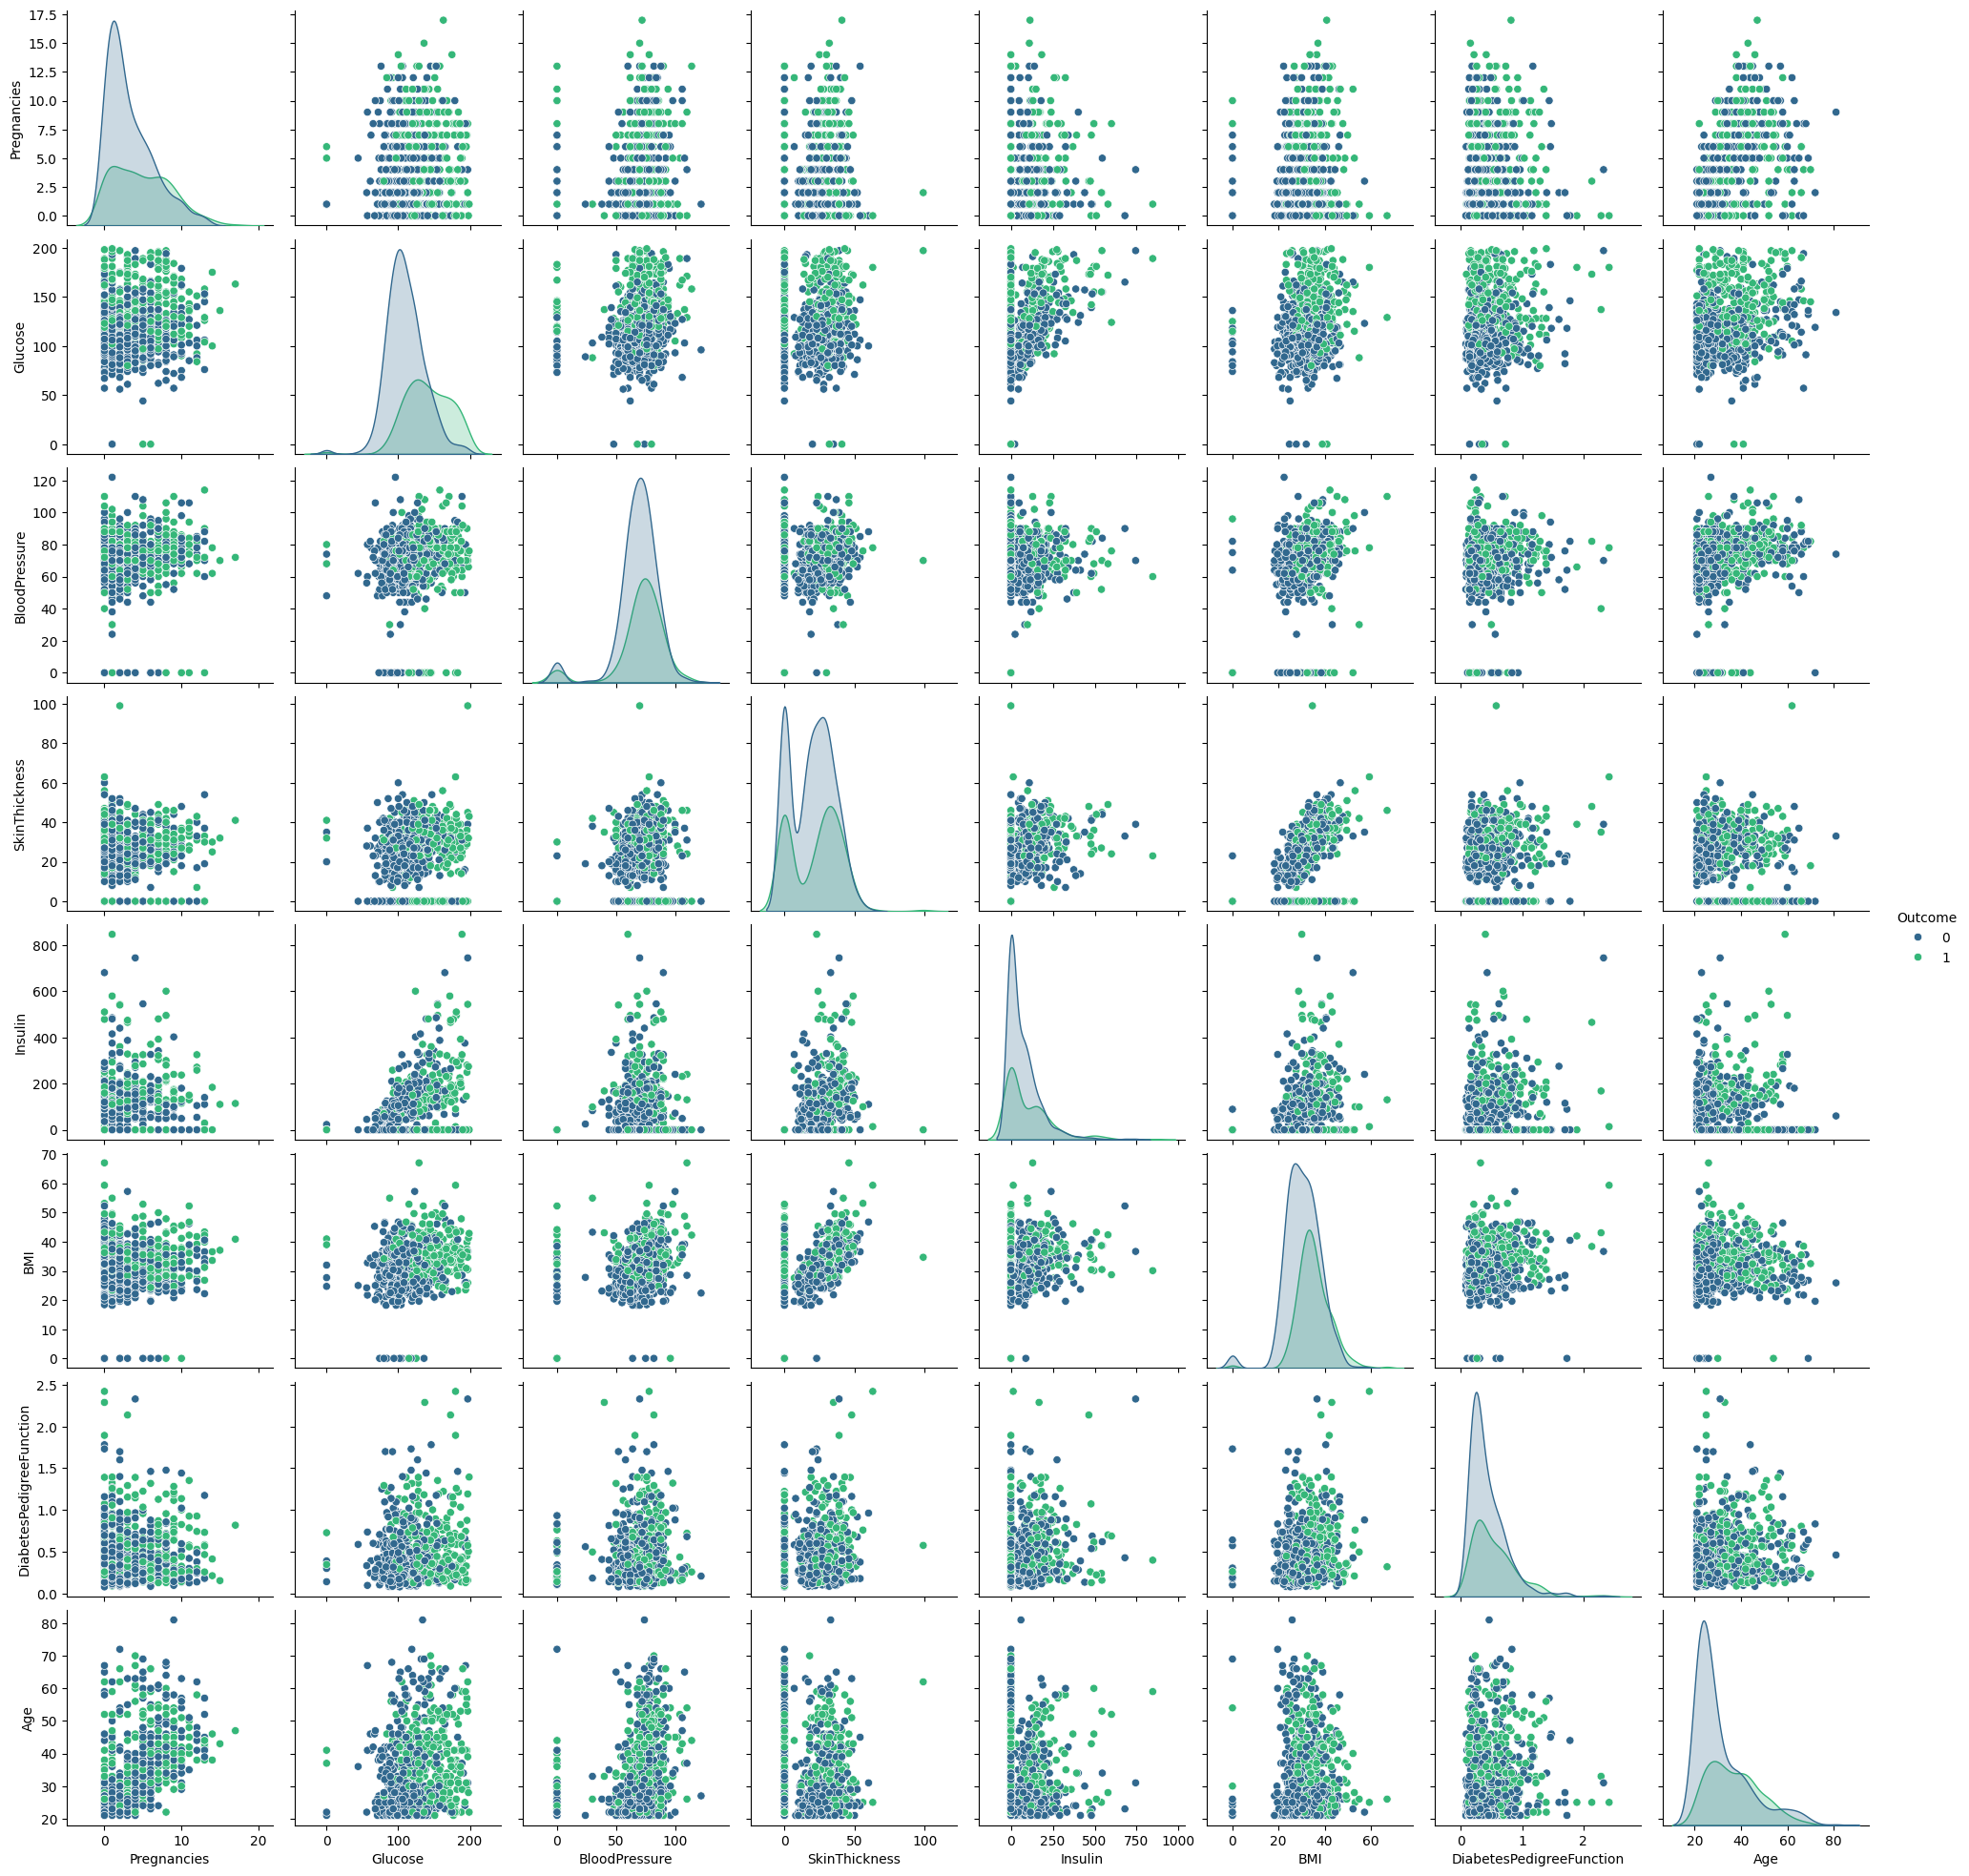

In [184]:
sns.pairplot(data=df,hue='Outcome',palette='viridis')

#Data Pre-Processing

In [185]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Tidak terdapat missing values dalam dataset diabetes**

In [186]:
df.duplicated().sum()

0

**Tidak terdapat data duplikat dalam dataset diabetes**

In [187]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

def handle_outliers(df):
    for col in df:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit))
        df_prep = df[filtered_entries]

    return df_prep

df_prep = handle_outliers(df)

print(f'Jumlah baris setelah memfilter outlier: {len(df_prep)}')

Jumlah baris sebelum memfilter outlier: 768
Jumlah baris setelah memfilter outlier: 768


**Tidak terdapat outliers dalam dataset diabetes**

In [188]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
#Standarization

from sklearn.preprocessing import StandardScaler

df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,7.401487e-17
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,1.000652e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,-7.321202e-01
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,-7.321202e-01
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,-7.321202e-01
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.365896e+00
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.365896e+00


In [190]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.365896
1,1,85,66,29,0,26.6,0.351,31,-0.732120
2,8,183,64,0,0,23.3,0.672,32,1.365896
3,1,89,66,23,94,28.1,0.167,21,-0.732120
4,0,137,40,35,168,43.1,2.288,33,1.365896


In [191]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_prep.drop(['Outcome'], axis=1)
y = df_prep['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'Number of Train Data: {X_train.shape[0]}')
print(f'Number of Test Data: {X_test.shape[0]}')

Number of Train Data: 614
Number of Test Data: 154


In [192]:
# OVERSAMPLING
from imblearn import over_sampling

X_oversampling , y_oversampling = over_sampling.SMOTE(random_state=42).fit_resample(X_train,y_train)
print(pd.Series(y_oversampling).value_counts())

0    401
1    401
Name: Outcome, dtype: int64


# Model

**Fit Model: Logistic Regression**

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [194]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [195]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [196]:
probabilities_train = model.predict_proba(X_train)

# Ambil probabilitas kelas positif (diabetes) dari data pelatihan
probabilities_positive_class_train = probabilities_train[:, 1]
(f"Probability of positive class train is {probabilities_positive_class_train}")

'Probability of positive class train is [0.00682764 0.46672338 0.32463404 0.62719539 0.70271321 0.13817563\n 0.54437992 0.64016814 0.19332962 0.01731712 0.13812423 0.85841367\n 0.04916474 0.28357026 0.76453593 0.57136289 0.6076112  0.18105732\n 0.33046869 0.71633506 0.55573083 0.08349383 0.27763787 0.27479551\n 0.21611444 0.2923574  0.50631426 0.52886742 0.37383511 0.76698331\n 0.63560199 0.0977382  0.04478194 0.12299357 0.82163645 0.37757717\n 0.07177712 0.08285601 0.91691866 0.20748033 0.0830985  0.05636613\n 0.00508117 0.0674278  0.25413944 0.66830011 0.13674161 0.11674242\n 0.36478986 0.27345696 0.67229407 0.09483627 0.11667642 0.25354093\n 0.88028578 0.65424998 0.25652152 0.19006816 0.16071951 0.1151803\n 0.7121313  0.08557761 0.67541787 0.30378916 0.31571282 0.86398317\n 0.58501272 0.11827462 0.08284484 0.15364327 0.06849438 0.75691891\n 0.34425098 0.30713754 0.2819296  0.19763707 0.11492388 0.04279834\n 0.16168552 0.45521164 0.28829787 0.47829799 0.11951147 0.23031268\n 0.334537

In [197]:
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [198]:
#Mengecek Akurasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung Akurasi
accuracy = accuracy_score(y_pred, y_test)

# Menghitung Precision, Recall, dan F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Menampilkan hasil
print(f"Accuracy of the model is: {accuracy:.2f}")
print(f'Precision of the model is: {precision:.2f}')
print(f'Recall of the model is: {recall:.2f}')
print(f'F1 Score of the model is: {f1:.2f}')

Accuracy of the model is: 0.75
Precision of the model is: 0.64
Recall of the model is: 0.67
F1 Score of the model is: 0.65


**Akurasi mengukur sejauh mana model dapat memprediksi dengan benar seluruh kelas (positif dan negatif)**

In [199]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Mendapatkan nilai TP dan FN dari confusion matrix
TP = conf_matrix[1, 1]  # True Positive
FN = conf_matrix[1, 0]  # False Negative

# Menghitung Diabetes Detection Rate (DDR) atau True Positive Rate (TPR)
DDR = TP / (TP + FN)

# Menampilkan hasil
print(f'Diabetes Detection Rate (DDR): {DDR:.2%}')

Diabetes Detection Rate (DDR): 67.27%


**Diabetes Detection Rate (DDR) mendeteksi kasus positif (diabetes) dari seluruh kasus yang sebenarnya positif**

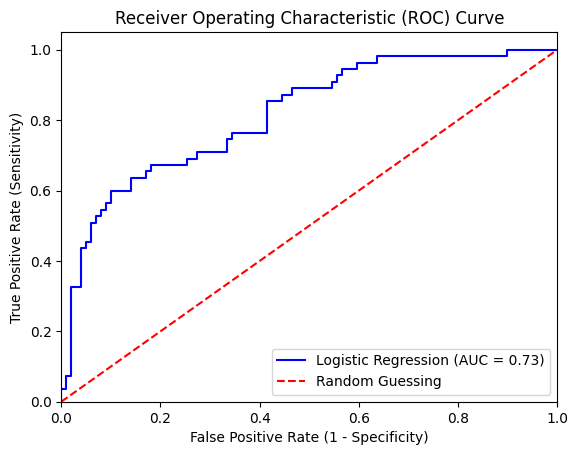

In [200]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Menghitung AUC-ROC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))

# Menghitung False Positive Rate (FPR), True Positive Rate (TPR), dan threshold
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Membuat kurva ROC
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC_Curve')
plt.show()

In [201]:
feature_importance = model.coef_[0]

# Menampilkan feature importance untuk setiap fitur
for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')

Pregnancies: 0.06642219797694897
Glucose: 0.03392817240549244
BloodPressure: -0.013823363864395095
SkinThickness: 0.0041576523466693455
Insulin: -0.0018122079654499372
BMI: 0.10116537641356443
DiabetesPedigreeFunction: 0.6196588309971777
Age: 0.03470757981304437


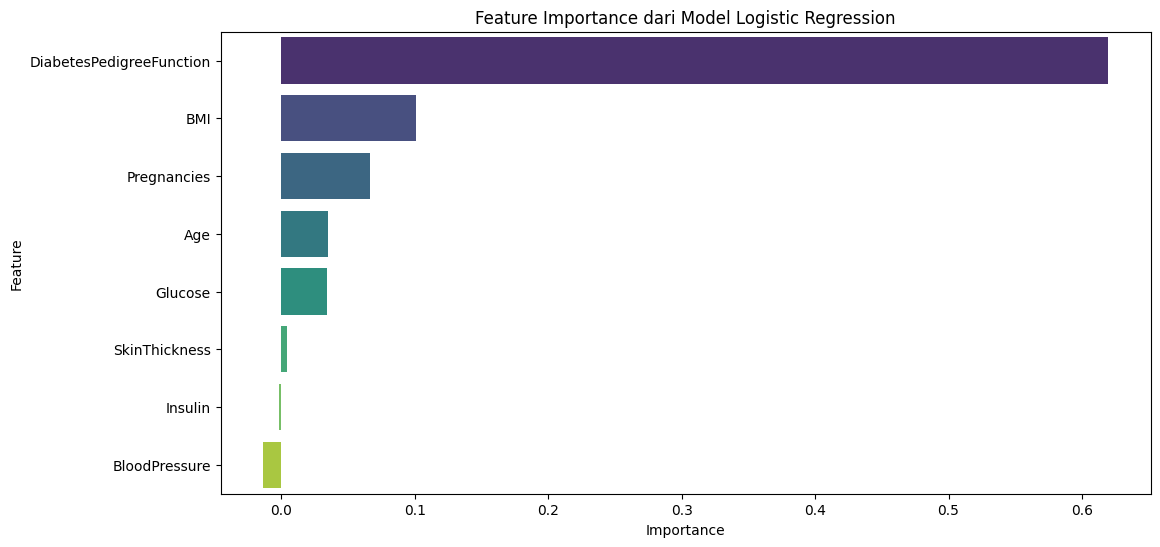

In [202]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance dari Model Logistic Regression')
plt.show()